## Regresion

### Lineal

#### 1. defincion

El análisis de Regresión es un subcampo de “machine learning supervisado”. Su propósito es establecer un modelo para la relación entre un cierto número de características y una variable objetivo continua.

En los problemas de regresión se persigue obtener una respuesta cuantitativa. Por ejemplo, predicciones sobre precios de inmuebles o el número de segundos que alguien dedicará a visualizar un vídeo.

Dado un conjunto de puntos, el algoritmo de regresión establecerá un modelo para ajustar la relación de dependencia entre una característica específica independiente (un valor de la variable independiente x) y el valor “resultado”correspondiente (un valor de la variable dependiente y).
Esta relación se realiza estableciendo una línea arbitraria y calculando la distancia de la recta a los puntos de datos correspondientes a los valores (x,y). Esta distancia, las líneas verticales, son los “residuos” o los “errores de predicción”.
El algoritmo de regresión recalculará (y moverá) la recta con cada interacción, buscando aquella que mejor se ajuste a los puntos de datos (x,y), o en otras palabras, la línea con el menor error (la más cercana al máximo número de puntos).

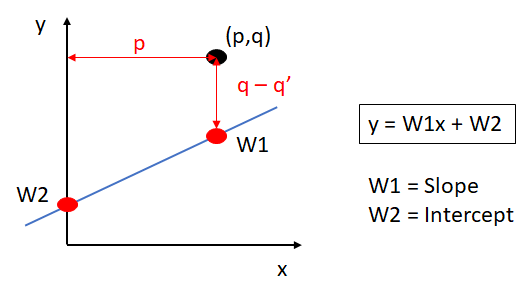

- W1: Slope (o pendiente), es la inclinación de la recta con respecto al eje de abcisas (x).
- W2: Intercept (o intersección), es el punto de corte de la recta con el eje de ordenadas (y).

#### 2. Implementar en python un ejemplo

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.linear_model import LinearRegression

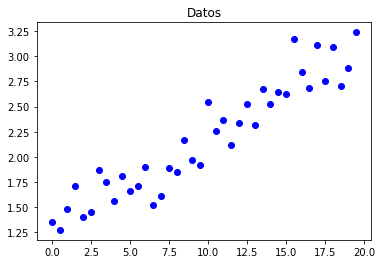

In [9]:
# Esta función genera datos que siguen una linea (Y = wX + b, con 0.1 para w y 1.25 para b)
# y se les agrega ruido para que se dispersen 
# función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano

def f(x): 
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado

plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');

In [10]:
#instancia de LinearRegression
regresion_lineal = LinearRegression()

# el metodo fit de scikitlearn se encarga de que la regresión lineal aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [0.09183522], b = 1.2858792525736682


En el resultado se puede ver que, debido al ruido que se agregó, la regresión lineal no estima 0.1, sino que 0,0918 para w; y que estima 1.2858 en vez de 1.25 para b

In [15]:
nuevo_x = np.array([5]) 

prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))

print(prediccion)

[1.74505534]


### Arboles 

https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

In [25]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "Concrete_Data.csv"
df = pd.read_csv(input_file, header = 0)

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [36]:
df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'cement'}, inplace = True)
df.rename(columns = {'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag'}, inplace = True)
df.rename(columns = {'Fly Ash (component 3)(kg in a m^3 mixture)':'ash'}, inplace = True)
df.rename(columns = {'Water  (component 4)(kg in a m^3 mixture)':'water'}, inplace = True)
df.rename(columns = {'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic'}, inplace =  True)
df.rename(columns = {'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_agg'}, inplace  = True)
df.rename(columns = {'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_agg'}, inplace = True)
df.rename(columns = {'Age (day)':'age'}, inplace = True)
df.rename(columns = {'Concrete compressive strength(MPa, megapascals) ':'strength'}, inplace = True)

df.head()

,cement,slag,ash,water,superplastic,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [37]:
features = list(df.columns[:8])

features
                

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarse_agg',
 'fine_agg',
 'age',
 'strength']

In [40]:
y = df['strength']
x = df[features]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=[''],
                   filled=True)
       

ValueError: Unknown label type: 'continuous'